In [21]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import numpy as np


In [22]:
#building a triangluar pyramid with numpy-stl
vertices = np.array([
    [0,0,0],#0
    [2,0,0],#1
    [0,2,0],#2
    [1,1,2]])#4
print(vertices)

[[0 0 0]
 [2 0 0]
 [0 2 0]
 [1 1 2]]


In [23]:
faces = np.array([[0,1,2],[0,3,1],[1,3,2],[0,2,3]])
print(faces)

[[0 1 2]
 [0 3 1]
 [1 3 2]
 [0 2 3]]


In [24]:
triangle = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        triangle.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"
triangle.save('triangle.stl')

[0 0 0]
[2 0 0]
[0 2 0]
[0 0 0]
[1 1 2]
[2 0 0]
[2 0 0]
[1 1 2]
[0 2 0]
[0 0 0]
[0 2 0]
[1 1 2]


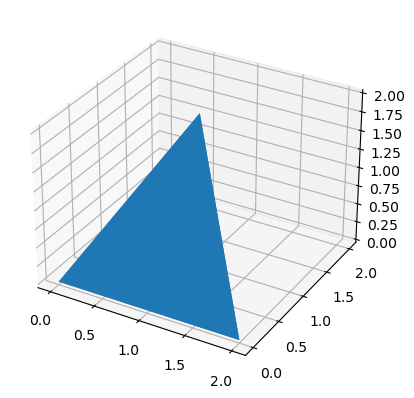

In [25]:
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(triangle.vectors))

# Auto scale to the mesh size
scale = triangle.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [26]:
#Decompiling the mesh into vertices and faces again
#points = triangle.points
#points = points.tolist()
#print(points)
#print(triangle.vectors)
#vertices_decomp = []
#for i in range(len(triangle.points)):
#    vertices_decomp.append(points[i][:3])
#    vertices_decomp.append(points[i][3:6])
#    vertices_decomp.append(points[i][6:9])
#print(vertices_decomp)

In [27]:
#find center of gravity

cog = triangle.get_mass_properties()[1] #getmassprop outputs [volume, cog, inertia]
print(cog)
#triangle.is_closed


[0.75 0.75 0.5 ]


In [28]:
#move object to origin
print(triangle.vectors)
print(triangle.vectors.shape)
cog_vector = np.full((4,3,3), cog) 
print(cog_vector)

[[[0. 0. 0.]
  [2. 0. 0.]
  [0. 2. 0.]]

 [[0. 0. 0.]
  [1. 1. 2.]
  [2. 0. 0.]]

 [[2. 0. 0.]
  [1. 1. 2.]
  [0. 2. 0.]]

 [[0. 0. 0.]
  [0. 2. 0.]
  [1. 1. 2.]]]
(4, 3, 3)
[[[0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]]

 [[0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]]

 [[0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]]

 [[0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]
  [0.75 0.75 0.5 ]]]


In [32]:
print(triangle.vectors)
triangle.vectors = triangle.vectors - cog_vector
print(triangle.vectors)
print(triangle.points)

[[[-0.75 -0.75 -0.5 ]
  [ 1.25 -0.75 -0.5 ]
  [-0.75  1.25 -0.5 ]]

 [[-0.75 -0.75 -0.5 ]
  [ 0.25  0.25  1.5 ]
  [ 1.25 -0.75 -0.5 ]]

 [[ 1.25 -0.75 -0.5 ]
  [ 0.25  0.25  1.5 ]
  [-0.75  1.25 -0.5 ]]

 [[-0.75 -0.75 -0.5 ]
  [-0.75  1.25 -0.5 ]
  [ 0.25  0.25  1.5 ]]]
[[[-1.5 -1.5 -1. ]
  [ 0.5 -1.5 -1. ]
  [-1.5  0.5 -1. ]]

 [[-1.5 -1.5 -1. ]
  [-0.5 -0.5  1. ]
  [ 0.5 -1.5 -1. ]]

 [[ 0.5 -1.5 -1. ]
  [-0.5 -0.5  1. ]
  [-1.5  0.5 -1. ]]

 [[-1.5 -1.5 -1. ]
  [-1.5  0.5 -1. ]
  [-0.5 -0.5  1. ]]]
[[-1.5 -1.5 -1.   0.5 -1.5 -1.  -1.5  0.5 -1. ]
 [-1.5 -1.5 -1.  -0.5 -0.5  1.   0.5 -1.5 -1. ]
 [ 0.5 -1.5 -1.  -0.5 -0.5  1.  -1.5  0.5 -1. ]
 [-1.5 -1.5 -1.  -1.5  0.5 -1.  -0.5 -0.5  1. ]]


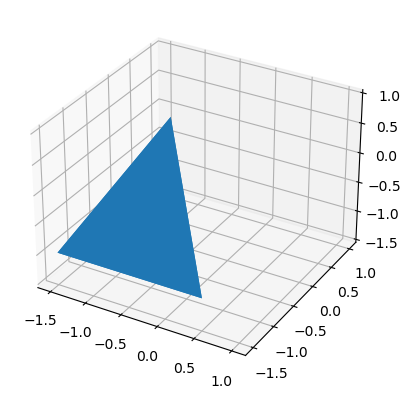

In [36]:
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(triangle.vectors))

# Auto scale to the mesh size
scale = triangle.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()